In [334]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from ml_metrics import rmsle, rmse
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from scikitplot.estimators import plot_learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install ml_metrics
!pip install scikit-plot

In [4]:
cd '/content/drive/MyDrive/otomoto/dane/'

/content/drive/MyDrive/otomoto/dane


# **Mercedes**

In [432]:
df1=pd.DataFrame(pd.read_json('mercedes_n.json'))
df2=pd.DataFrame(pd.read_json('mercedes_d_n.json'))
df3=pd.DataFrame(pd.read_json('mercedes_2_do_50_n.json'))
df4=pd.DataFrame(pd.read_json('mercedes_2_od_50_n.json'))
df5=pd.DataFrame(pd.read_json('mercedes_d_2_do_50_n.json'))
df6=pd.DataFrame(pd.read_json('mercedes_d_2_od_50_n.json'))
df1=df1.T
df2=df2.T
df3=df3.T
df4=df4.T
df5=df5.T
df6=df6.T
df=pd.concat([df1, df2, df3, df4, df5, df6], sort=False, ignore_index=True)



In [134]:
df


,cena,oferta-od,oferta_od,kategoria,marka-pojazdu,marka_pojazdu,model-pojazdu,model_pojazu,wersja,rok-produkcji,rok_produkcji,przebieg,przebieg_km,pojemnosc-skokowa,pojemnosc_skokowa_cm3,rodzaj-paliwa,rodzaj_paliwa,moc,moc_KM,skrzynia-biegow,skrzynia_biegow,naped,naped_,emisja-co2,typ,typ_,liczba-drzwi,liczba_drzwi,liczba-miejsc,liczba_miejsc,kolor,kolor_,metalik,vat-marza,pierwsza-rejestracja,pierwsza_rejestracja,numer-rejestracyjny-pojazdu,zarejestrowany-w-polsce,zarejestrowany_w_polsce,serwisowany-w-aso,serwisowany_w_aso,stan,stan_,generacja,faktura-vat,faktura_vat,kraj-pochodzenia,kraj_pochodzenia,kod-silnika,pierwszy-wlasciciel,pierwszy_wlasciciel,bezwypadkowy,bezwypadkowy_,tuning,perlowy,perlowy_,mozliwosc-finansowania,mozliwosc_finansowania,leasing,leasing_,okres-gwarancji-producenta,okres_gwarancji_producenta,uszkodzony,lub-do-przebieg-km,akryl-niemetalizowany,matowy,filtr-czastek-stalych,warranty-if-agreed-with-the-buyer,oplata-poczatkowa,miesieczna-rata,liczba-pozostalych-rat,wartosc-wykupu,homologacja-ciezarowa,vin,gwarancja-dealerska-w-cenie,zarejestrowany-jako-zabytek,kierownica-po-prawej-anglik
0,89500,\n\n Osoby prywatnej ...,Osoby prywatnej,Osobowe,\n\n Mercedes-Benz ...,Mercedes-Benz,\n\n CLA \n,CLA,250 4-Matic,\n 2014,2014,\n 146 000 km,146 000 km,\n 1 991 cm3,1 991 cm3,\n\n Benzyna \n,Benzyna,\n 211 KM,211 KM,\n\n Automatyczna ...,Automatyczna,\n\n 4x4 (stały) \n,4x4 (stały),\n 154 g/km,\n\n Sedan \n,Sedan,\n 4,4,\n 5,5,\n\n Biały \n,Biały,\n\n Tak \n,\n\n Tak \n,\n 01/01/2014,01/01/2014,\n WWL0488P,\n\n Tak \n,Tak,\n\n Tak \n,Tak,\n\n Używane \n,Używane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79827,\n\n Osoby prywatnej ...,Osoby prywatnej,Osobowe,\n\n Mercedes-Benz ...,Mercedes-Benz,\n\n Klasa A \n,Klasa A,180 7G-DCT AMG Line,\n 2016,2016,\n 58 500 km,58 500 km,\n 1 595 cm3,1 595 cm3,\n\n Benzyna \n,Benzyna,\n 122 KM,122 KM,\n\n Automatyczna ...,Automatyczna,\n\n Na przednie koła ...,Na przednie koła,\n 119 g/km,\n\n Kompakt \n,Kompakt,\n 5,5,\n 5,5,\n\n Czarny \n,Czarny,NaN,NaN,NaN,NaN,NaN,\n\n Tak \n,Tak,NaN,NaN,\n\n Używane \n,Używane,W176 (2012-),\n\n Tak \n,Tak,\n\n Polska \n,Polska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,121225,\n\n Osoby prywatnej ...,Osoby prywatnej,Osobowe,\n\n Mercedes-Benz ...,Mercedes-Benz,\n\n Klasa A \n,Klasa A,w177-2018,\n 2019,2019,\n 19 500 km,19 500 km,NaN,NaN,\n\n Benzyna \n,Benzyna,\n 136 KM,136 KM,\n\n Automatyczna ...,Automatyczna,\n\n Na przednie koła ...,Na przednie koła,NaN,\n\n Auta małe \n,Auta małe,NaN,NaN,NaN,NaN,\n\n Czerwony \n,Czerwony,\n\n Tak \n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\n\n Używane \n,Używane,W177 (2018-),NaN,NaN,NaN,NaN,\n\n A 180 \n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,48900,\n\n Osoby prywatnej ...,Osoby prywatnej,Osobowe,\n\n Mercedes-Benz ...,Mercedes-Benz,\n\n SL \n,SL,NaN,\n 1999,1999,\n 179 800 km,179 800 km,\n 2 799 cm3,2 799 cm3,\n\n Benzyna \n,Benzyna,\n 204 KM,204 KM,\n\n Automatyczna ...,Automatyczna,\n\n Na tylne koła ...,Na tylne koła,NaN,\n\n Kabriolet \n,Kabriolet,\n 2,2,\n 4,4,\n\n Srebrny \n,Srebrny,\n\n Tak \n,NaN,NaN,NaN,NaN,\n\n Tak \n,Tak,\n\n Tak \n,Tak,\n\n Używane \n,Używane,R129 (1989-2000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42500,\n\n Osoby prywatnej ...,Osoby prywatnej,Osobowe,\n\n Mercedes-Benz ...,Mercedes-Benz,\n\n Klasa E \n,Klasa E,250 CGI BlueEffICIENCY Avantgarde,\n 2010,2010,\n 297 000 km,297 000 km,\n 1 796 cm3,1 796 cm3,\n\n Benzyna \n,Benzyna,\n 204 KM,204 KM,\n\n Automatyczna ...,Automatyczna,\n\n Na tylne koła ...,Na tylne koła,\n 187 g/km,\n\n Sedan \n,Sedan,\n 4,4,\n 5,5,\n\n Czarny \n,Czarny,NaN,NaN,NaN,NaN,NaN,\n\n Tak \n,Tak,\n\n Tak \n,Tak,\n\n Używane \n,U

In [ ]:
df.info()

In [433]:
df=df.drop(columns=['oferta-od',
                   'marka-pojazdu',
                   'model-pojazdu',
                   'rok-produkcji',
                   'przebieg',
                   'pojemnosc-skokowa',
                   'rodzaj-paliwa',
                   'moc',
                   'skrzynia-biegow',
                   'naped',
                   'emisja-co2',
                   'typ',
                   'liczba-drzwi',
                   'liczba-miejsc',
                   'filtr-czastek-stalych',
                   'kod-silnika',
                   'kolor',
                   'akryl-niemetalizowany',
                   'matowy',
                   'leasing',
                    'kategoria',
                    'pierwsza-rejestracja',
                    'zarejestrowany-w-polsce',
                    'serwisowany-w-aso',
                    'stan',
                    'faktura-vat',
                    'kraj-pochodzenia',
                    'kod-silnika',
                    'pierwszy-wlasciciel',
                    'bezwypadkowy',
                    'tuning',
                    'perlowy',
                    'mozliwosc-finansowania',
                    'leasing',
                    'okres-gwarancji-producenta',
                    'uszkodzony',
                    'lub-do-przebieg-km',
                    'akryl-niemetalizowany',
                    'matowy',
                    'warranty-if-agreed-with-the-buyer',
                    'oplata-poczatkowa',
                    'miesieczna-rata',
                    'liczba-pozostalych-rat',
                    'wartosc-wykupu',
                    'homologacja-ciezarowa',
                    'vin',
                    'gwarancja-dealerska-w-cenie',
                    'zarejestrowany-jako-zabytek',
                    'kierownica-po-prawej-anglik',
                    'metalik',
                    'vat-marza'])

df

,cena,oferta_od,marka_pojazdu,model_pojazu,wersja,rok_produkcji,przebieg_km,pojemnosc_skokowa_cm3,rodzaj_paliwa,moc_KM,skrzynia_biegow,naped_,typ_,liczba_drzwi,liczba_miejsc,kolor_,pierwsza_rejestracja,numer-rejestracyjny-pojazdu,zarejestrowany_w_polsce,serwisowany_w_aso,stan_,generacja,faktura_vat,kraj_pochodzenia,pierwszy_wlasciciel,bezwypadkowy_,perlowy_,mozliwosc_finansowania,leasing_,okres_gwarancji_producenta
0,89500,Osoby prywatnej,Mercedes-Benz,CLA,250 4-Matic,2014,146 000 km,1 991 cm3,Benzyna,211 KM,Automatyczna,4x4 (stały),Sedan,4,5,Biały,01/01/2014,\n WWL0488P,Tak,Tak,Używane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79827,Osoby prywatnej,Mercedes-Benz,Klasa A,180 7G-DCT AMG Line,2016,58 500 km,1 595 cm3,Benzyna,122 KM,Automatyczna,Na przednie koła,Kompakt,5,5,Czarny,NaN,NaN,Tak,NaN,Używane,W176 (2012-),Tak,Polska,NaN,NaN,NaN,NaN,NaN,NaN
2,121225,Osoby prywatnej,Mercedes-Benz,Klasa A,w177-2018,2019,19 500 km,NaN,Benzyna,136 KM,Automatyczna,Na przednie koła,Auta małe,NaN,NaN,Czerwony,NaN,NaN,NaN,NaN,Używane,W177 (2018-),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,48900,Osoby prywatnej,Mercedes-Benz,SL,NaN,1999,179 800 km,2 799 cm3,Benzyna,204 KM,Automatyczna,Na tylne koła,Kabriolet,2,4,Srebrny,NaN,NaN,Tak,Tak,Używane,R129 (1989-2000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42500,Osoby prywatnej,Mercedes-Benz,Klasa E,250 CGI BlueEffICIENCY Avantgarde,2010,297 000 km,1 796 cm3,Benzyna,204 KM,Automatyczna,Na tylne koła,Sedan,4,5,Czarny,NaN,NaN,Tak,Tak,Używane,W212 (2009-2016),NaN,NaN,Tak,Tak,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11466,213800,Firmy,Mercedes-Benz,Klasa S,350 BlueTEC L 7G-TRONIC,2015,116 000 km,2 987 cm3,Diesel,258 KM,Automatyczna,Na tylne koła,Sedan,4,5,Czarny,02/05/2015,NaN,Tak,Tak,Używane,W222 (2013-),Tak,Niemcy,NaN,Tak,NaN,Tak,NaN,NaN
11467,222900,Firmy,Mercedes-Benz,GLC,220 d 4-Matic,2019,38 800 km,1 950 cm3,Diesel,194 KM,Automatyczna,4x4 (stały),SUV,5,5,Inny kolor,12/12/2019,\n AMG220,Tak,Tak,Używane,NaN,NaN,NaN,Tak,NaN,NaN,NaN,NaN,NaN
11468,319900,Firmy,Mercedes-Benz,GLE,300 d 4-Matic,2020,8 100 km,1 950 cm3,Diesel,245 KM,Automatyczna,4x4 (stały),SUV,5,5,Biały,10/08/2020,NaN,Tak,Tak,Używane,W167 (2019-),Tak,Polska,Tak,Tak,Tak,Tak,NaN,NaN
11469,50000,Firmy,Mercedes-Benz,Klasa C,NaN,2017,48 000 km,NaN,Benzyna,NaN,NaN,NaN,Sedan,NaN,NaN,Czarny,NaN,NaN,NaN,NaN,Używane,W205 (2014-),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11471 entries, 0 to 11470
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   cena                         11471 non-null  object
 1   oferta_od                    11471 non-null  object
 2   marka_pojazdu                11471 non-null  object
 3   model_pojazu                 11471 non-null  object
 4   wersja                       7114 non-null   object
 5   rok_produkcji                11471 non-null  object
 6   przebieg_km                  11317 non-null  object
 7   pojemnosc_skokowa_cm3        11329 non-null  object
 8   rodzaj_paliwa                11471 non-null  object
 9   moc_KM                       11390 non-null  object
 10  skrzynia_biegow              11409 non-null  object
 11  naped_                       10453 non-null  object
 12  typ_                         11471 non-null  object
 13  liczba_drzwi                 11

In [347]:
df.describe()

,cena,oferta_od,marka_pojazdu,model_pojazu,wersja,rok_produkcji,przebieg_km,pojemnosc_skokowa_cm3,rodzaj_paliwa,moc_KM,skrzynia_biegow,naped_,typ_,liczba_drzwi,liczba_miejsc,kolor_,pierwsza_rejestracja,numer-rejestracyjny-pojazdu,zarejestrowany_w_polsce,serwisowany_w_aso,stan_,generacja,faktura_vat,kraj_pochodzenia,pierwszy_wlasciciel,bezwypadkowy_,perlowy_,mozliwosc_finansowania,leasing_,okres_gwarancji_producenta
count,11471,11471,11471,11471,7114,11471,11317,11329,11471,11390,11409,10453,11471,11328,10484,11471,4476,2663,6367,5107,11471,8816,3754,6484,3643,6233,1034,4192,1718,507
unique,2825,2,4,45,1403,71,4184,239,6,276,2,5,9,5,8,14,2893,2531,1,1,2,63,1,22,1,1,2,1,1,359
top,15900,Firmy,Mercedes-Benz,Klasa E,500,2020,1 km,1 991 cm3,Diesel,163 KM,Automatyczna,Na tylne koła,Sedan,5,5,Czarny,01/01/2015,\n AA12345,Tak,Tak,Używane,W204 (2007-2014),Tak,Polska,Tak,Tak,Tak,Tak,Tak,01/03/2022
freq,86,5976,11468,2166,155,1033,358,1192,5580,791,8707,4987,3881,6153,8206,3689,16,8,6367,5107,10342,678,3754,3167,3643,6233,1032,4192,1718,6


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


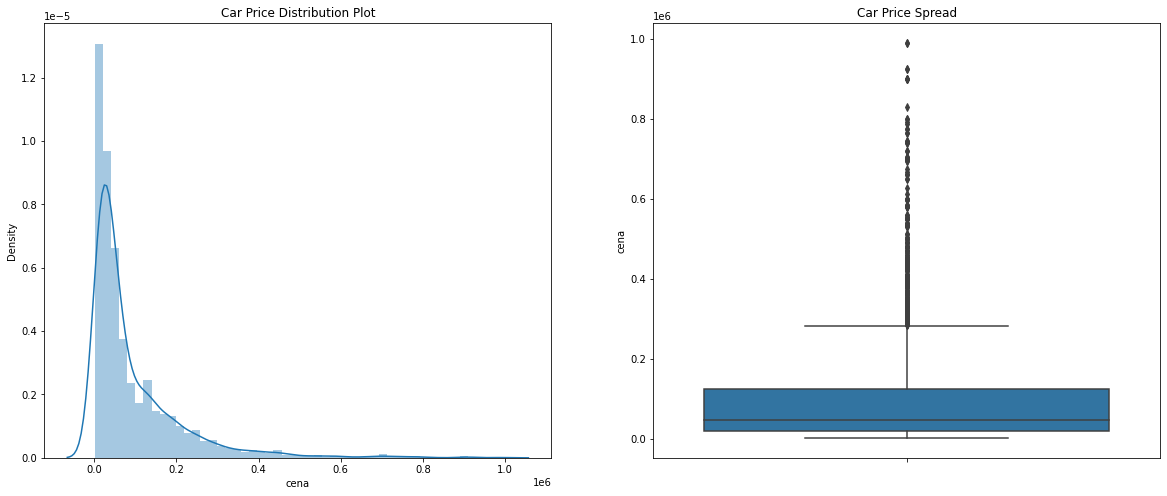

In [548]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.cena)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.cena)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


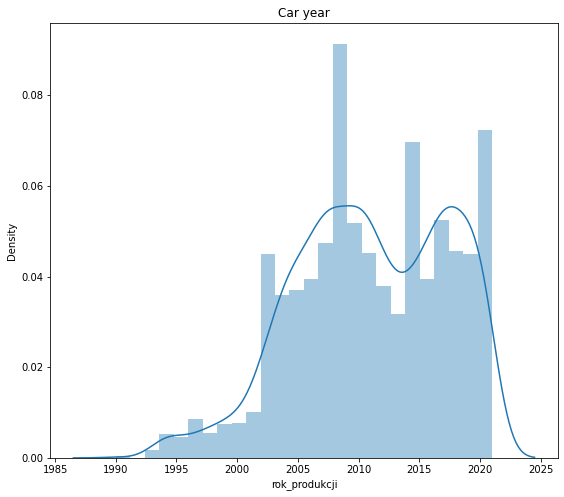

In [341]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car year')
sns.distplot(df.rok_produkcji)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


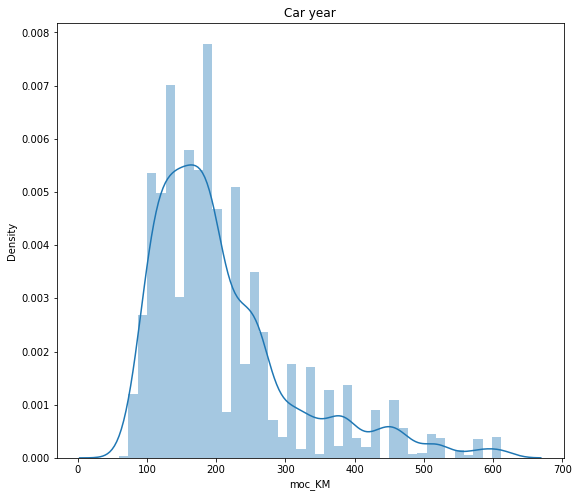

In [342]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car power')
sns.distplot(df.moc_KM)

plt.show()

### **model type**

In [435]:
df=df[df['model_pojazu'].isin(['Klasa A','Klasa B','Klasa C','Klasa E','Klasa S'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 1 to 11470
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   cena                         6665 non-null   object
 1   oferta_od                    6665 non-null   object
 2   marka_pojazdu                6665 non-null   object
 3   model_pojazu                 6665 non-null   object
 4   wersja                       4411 non-null   object
 5   rok_produkcji                6665 non-null   object
 6   przebieg_km                  6627 non-null   object
 7   pojemnosc_skokowa_cm3        6624 non-null   object
 8   rodzaj_paliwa                6665 non-null   object
 9   moc_KM                       6620 non-null   object
 10  skrzynia_biegow              6627 non-null   object
 11  naped_                       6093 non-null   object
 12  typ_                         6665 non-null   object
 13  liczba_drzwi                 658

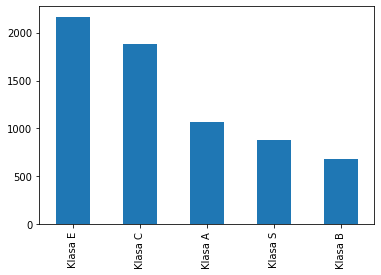

In [436]:
df['model_pojazu'].value_counts().plot(kind='bar')

### **version**

In [437]:
df = df.astype({'wersja':'string','generacja':'string', 'przebieg_km':'string', 'pojemnosc_skokowa_cm3':'string'})

In [476]:
df=df.dropna(subset=['wersja', 'generacja', 'pojemnosc_skokowa_cm3'])

In [ ]:
for i in sorted(df['wersja']):
  print(i)

In [438]:
# df['wersja']=~df["wersja"].str.contains('w247', 'w246', 'w245', 'w222','w221','w220','w213','w212', 'w211','w210','w205','w204','w203','w177','w176','w169','w167','w166','w140', 'w126','w124','ver','c218','c219','c257')
df=df[~df["wersja"].str.contains('w2|w1|W1|W2|ver|c2')]

In [ ]:
df['wersja'].value_counts().index[1:40]


In [ ]:
df=df[~df['wersja'].str.contains("AMG|63|53 |45 |43 ", na=False)]
df

In [ ]:
for i in sorted(df['wersja']):
  print(i)

In [465]:
df['wersja']=df['wersja'].map(lambda x: x.split(' ')[0].strip())

In [469]:
df=df[~df['wersja'].str.contains("200T|260|210|S320L|350e|Electric|190|290|Avangard", na=False)]

In [ ]:
df['wersja'].value_counts()

In [ ]:
df

In [442]:
df2=df

In [443]:
df2=df2[(df2['wersja'].str.contains("AMG|63|53 |45 |43 ", na=False) & ~df["wersja"].str.contains("AMG Line", na=False))]
df2

,cena,oferta_od,marka_pojazdu,model_pojazu,wersja,rok_produkcji,przebieg_km,pojemnosc_skokowa_cm3,rodzaj_paliwa,moc_KM,skrzynia_biegow,naped_,typ_,liczba_drzwi,liczba_miejsc,kolor_,pierwsza_rejestracja,numer-rejestracyjny-pojazdu,zarejestrowany_w_polsce,serwisowany_w_aso,stan_,generacja,faktura_vat,kraj_pochodzenia,pierwszy_wlasciciel,bezwypadkowy_,perlowy_,mozliwosc_finansowania,leasing_,okres_gwarancji_producenta,wersja2
6,299000,Osoby prywatnej,Mercedes-Benz,Klasa E,53 AMG 4Matic AMG Speedshift 9G-MCT,2019,26 400 km,2 999 cm3,Benzyna,435 KM,Automatyczna,4x4 (stały),Sedan,4,5,Szary,16/02/2021,\n WS0399F,Tak,NaN,Używane,W213 (2016-),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,299000
7,139900,Osoby prywatnej,Mercedes-Benz,Klasa A,AMG 45 4Matic AMG Speedshift 7G-DCT,2016,52 000 km,1 991 cm3,Benzyna,381 KM,Automatyczna,4x4 (stały),Kompakt,5,5,Szary,21/12/2016,\n WZ310AJ,Tak,Tak,Używane,W176 (2012-),Tak,Polska,Tak,Tak,NaN,NaN,NaN,NaN,139900
19,238000,Osoby prywatnej,Mercedes-Benz,Klasa E,43 AMG 4Matic 9G-TRONIC,2017,72 000 km,2 996 cm3,Benzyna,401 KM,Automatyczna,4x4 (stały),Sedan,4,5,Szary,NaN,\n DW9S384,Tak,Tak,Używane,W213 (2016-),Tak,Polska,Tak,Tak,Tak,NaN,NaN,NaN,238000
37,131930,Osoby prywatnej,Mercedes-Benz,Klasa A,AMG 45 4Matic AMG Speedshift 7G-DCT,2016,47 000 km,1 991 cm3,Benzyna,381 KM,Automatyczna,4x4 (stały),Kompakt,5,5,Szary,10/01/2017,\n WI888FL,Tak,Tak,Używane,W176 (2012-),NaN,Polska,NaN,Tak,NaN,NaN,Tak,NaN,131930
64,163900,Osoby prywatnej,Mercedes-Benz,Klasa E,63 AMG,2009,50 000 km,6 208 cm3,Benzyna,525 KM,Automatyczna,Na tylne koła,Sedan,4,5,Biały,NaN,NaN,NaN,NaN,Używane,W212 (2009-2016),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304,260000,Firmy,Mercedes-Benz,Klasa A,AMG 45 S 4Matic+ AMG Speedshift DCT 8G,2020,3 km,1 991 cm3,Benzyna,421 KM,Automatyczna,4x4 (stały),Kompakt,5,5,Czarny,NaN,NaN,NaN,NaN,Nowe,W177 (2018-),Tak,Polska,NaN,Tak,NaN,Tak,NaN,NaN,260000
11322,220200,Firmy,Mercedes-Benz,Klasa A,35 AMG 4-Matic 7G-DCT,2021,3 km,1 991 cm3,Benzyna,306 KM,Automatyczna,4x4 (stały),Kompakt,4,5,Czarny,NaN,NaN,NaN,NaN,Nowe,W177 (2018-),Tak,Polska,NaN,Tak,NaN,Tak,NaN,NaN,220200
11355,399900,Firmy,Mercedes-Benz,Klasa S,AMG 63 Coupe 4Matic AMG Speedshift 7G-MCT,2017,108 300 km,5 461 cm3,Benzyna,585 KM,Automatyczna,4x4 (stały),Coupe,2,4,Czarny,NaN,NaN,Tak,NaN,Używane,W222 (2013-),Tak,Stany Zjednoczone,NaN,NaN,NaN,Tak,Tak,NaN,399900
11376,119999,Firmy,Mercedes-Benz,Klasa A,AMG 45 4-Matic,2015,51 000 km,1 991 cm3,Benzyna,381 KM,Automatyczna,4x4 (stały),Kompakt,5,5,Czarny,NaN,NaN,NaN,Tak,Używane,W176 (2012-),NaN,NaN,Tak,NaN,Tak,Tak,NaN,NaN,119999


In [ ]:
for i in sorted(df2['wersja']):
  print(i)

In [ ]:
df2['wersja2']=df2['wersja'].map(lambda x: x.split(' ')[0].strip())
df2['wersja3']=df2['wersja'].map(lambda x: x.split(' ')[1].strip())


In [ ]:
df2['wersja']=df2['wersja2']+" "+df2['wersja3']

In [ ]:
df2['wersja']=df2['wersja'].replace('AMG 63', '63 AMG')
df2['wersja']=df2['wersja'].replace('AMG 53', '53 AMG')
df2['wersja']=df2['wersja'].replace('AMG 45', '45 AMG')
df2['wersja']=df2['wersja'].replace('AMG 43', '43 AMG')
df2['wersja']=df2['wersja'].replace('200 4-Matic', '200 AMG')
df2['wersja']=df2['wersja'].replace('220 d', '200 AMG')
df2['wersja']=df2['wersja'].replace('300 de', '300 AMG')
df2['wersja']=df2['wersja'].replace('32 T', '32 AMG')
df2['wersja']=df2['wersja'].replace('AMG 35', '35 AMG')
df2['wersja']=df2['wersja'].replace('450 AMG', '45 AMG')
df2['wersja']=df2['wersja'].replace('45 S', '45 AMG')
df2['wersja']=df2['wersja'].replace('43 T', '43 AMG')
df2['wersja']=df2['wersja'].replace('63 S', '63 AMG')
df2['wersja']=df2['wersja'].replace('55 L', '55 AMG')
df2['wersja']=df2['wersja'].replace('55 T', '55 AMG')
df2['wersja']=df2['wersja'].replace('450 Coupe', '45 AMG')

In [ ]:
for i in sorted(df2['wersja']):
  print(i)

In [473]:
df=pd.concat([df, df2], sort=False, ignore_index=True)
df

,cena,oferta_od,marka_pojazdu,model_pojazu,wersja,rok_produkcji,przebieg_km,pojemnosc_skokowa_cm3,rodzaj_paliwa,moc_KM,skrzynia_biegow,naped_,typ_,liczba_drzwi,liczba_miejsc,kolor_,pierwsza_rejestracja,numer-rejestracyjny-pojazdu,zarejestrowany_w_polsce,serwisowany_w_aso,stan_,generacja,faktura_vat,kraj_pochodzenia,pierwszy_wlasciciel,bezwypadkowy_,perlowy_,mozliwosc_finansowania,leasing_,okres_gwarancji_producenta,wersja2,wersja3
0,42500,Osoby prywatnej,Mercedes-Benz,Klasa E,250,2010,297 000 km,1 796 cm3,Benzyna,204 KM,Automatyczna,Na tylne koła,Sedan,4,5,Czarny,NaN,NaN,Tak,Tak,Używane,W212 (2009-2016),NaN,NaN,Tak,Tak,NaN,NaN,NaN,NaN,250,NaN
1,135900,Osoby prywatnej,Mercedes-Benz,Klasa E,220,2017,135 000 km,1 950 cm3,Diesel,194 KM,Automatyczna,Na tylne koła,Kombi,5,5,Czarny,17/03/2020,\n ZS664MC,Tak,NaN,Używane,W213 (2016-),NaN,Niemcy,NaN,Tak,NaN,NaN,NaN,NaN,220,NaN
2,55000,Osoby prywatnej,Mercedes-Benz,Klasa E,220,2011,130 000 km,2 143 cm3,Diesel,170 KM,Manualna,Na tylne koła,Kombi,5,5,Srebrny,NaN,NaN,Tak,NaN,Używane,W212 (2009-2016),NaN,NaN,NaN,Tak,NaN,NaN,NaN,NaN,220,NaN
3,73999,Osoby prywatnej,Mercedes-Benz,Klasa C,180,2015,168 700 km,1 598 cm3,Diesel,116 KM,Automatyczna,Na tylne koła,Sedan,4,5,Srebrny,06/03/2015,\n SB8858AS,Tak,NaN,Używane,W205 (2014-),NaN,Niemcy,NaN,Tak,Tak,NaN,NaN,NaN,180,NaN
4,5475,Osoby prywatnej,Mercedes-Benz,Klasa E,200,1998,296 000 km,1 998 cm3,Benzyna+LPG,136 KM,Manualna,Na tylne koła,Sedan,4,NaN,Niebieski,NaN,NaN,NaN,NaN,Używane,W210 (1995-2002),NaN,NaN,NaN,Tak,Tak,NaN,NaN,NaN,200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,260000,Firmy,Mercedes-Benz,Klasa A,45 AMG,2020,3 km,1 991 cm3,Benzyna,421 KM,Automatyczna,4x4 (stały),Kompakt,5,5,Czarny,NaN,NaN,NaN,NaN,Nowe,W177 (2018-),Tak,Polska,NaN,Tak,NaN,Tak,NaN,NaN,AMG,45
4374,220200,Firmy,Mercedes-Benz,Klasa A,35 AMG,2021,3 km,1 991 cm3,Benzyna,306 KM,Automatyczna,4x4 (stały),Kompakt,4,5,Czarny,NaN,NaN,NaN,NaN,Nowe,W177 (2018-),Tak,Polska,NaN,Tak,NaN,Tak,NaN,NaN,35,AMG
4375,399900,Firmy,Mercedes-Benz,Klasa S,63 AMG,2017,108 300 km,5 461 cm3,Benzyna,585 KM,Automatyczna,4x4 (stały),Coupe,2,4,Czarny,NaN,NaN,Tak,NaN,Używane,W222 (2013-),Tak,Stany Zjednoczone,NaN,NaN,NaN,Tak,Tak,NaN,AMG,63
4376,119999,Firmy,Mercedes-Benz,Klasa A,45 AMG,2015,51 000 km,1 991 cm3,Benzyna,381 KM,Automatyczna,4x4 (stały),Kompakt,5,5,Czarny,NaN,NaN,NaN,Tak,Używane,W176 (2012-),NaN,NaN,Tak,NaN,Tak,Tak,NaN,NaN,AMG,45


In [386]:
df2 = df2.astype({'wersja':'string'})

In [362]:
df['premium']=(df["wersja"].str.contains("AMG|63|53 |45 |43 ", na=False) & ~df["wersja"].str.contains("AMG Line", na=False))



In [367]:
df['premium'].value_counts()

False    3921
True      273
Name: premium, dtype: Int64

In [ ]:
df.loc[df['premium'] == True]

### **Generation**

In [ ]:
df['generacja'].value_counts()

In [ ]:
df['generacja']=df['generacja'].map(lambda x: x.split(' ')[0].strip())

### **Offer**

In [ ]:
df['oferta_od'].value_counts()

### **Year**

In [ ]:
df['rok_produkcji'].value_counts()

### **car mileage**

In [ ]:
df['przebieg_km'].value_counts()

In [ ]:
df['przebieg_km']=df['przebieg_km'].map(lambda x: x.split(' km')[0].strip())
df['przebieg_km']=df['przebieg_km'].map(lambda x: x.replace(' ',''))
df['przebieg_km'].value_counts()

### **engine capacity**

In [ ]:
df['pojemnosc_skokowa_cm3'].value_counts()

In [ ]:
df['pojemnosc_skokowa_cm3']=df['pojemnosc_skokowa_cm3'].map(lambda x: x.split(' cm3')[0].strip())
df['pojemnosc_skokowa_cm3']=df['pojemnosc_skokowa_cm3'].map(lambda x: x.replace(' ',''))
df['pojemnosc_skokowa_cm3'].value_counts()

### **Fuel**

In [ ]:
df['rodzaj_paliwa'].value_counts()

### **Power**

In [ ]:
df['moc_KM'].value_counts()

In [ ]:
df['moc_KM']=df['moc_KM'].map(lambda x: x.split(' KM')[0].strip())
df['moc_KM'].value_counts()

In [ ]:
df['skrzynia_biegow'].value_counts()

In [503]:
df['naped_'].value_counts()

Na tylne koła       2262
4x4 (stały)          967
Na przednie koła     881
Name: naped_, dtype: int64

In [ ]:
df['naped_']=df['naped_'].replace('4x4 (dołączany automatycznie)','4x4 (stały)')
df['naped_']=df['naped_'].replace('4x4 (dołączany ręcznie)','4x4 (stały)')
df['naped_']=df['naped_'].replace(np.nan,'Na tylne koła')
df['naped_'].value_counts()

### **Price**

In [ ]:
df['cena']=df['cena'].map(lambda x: x.split(',')[0].strip())

In [ ]:
df['bezwypadkowy_'].value_counts()

In [ ]:
df['bezwypadkowy_']=df['bezwypadkowy_'].replace(np.nan, 'Nie')

In [ ]:
df['kraj_pochodzenia'].value_counts()

In [ ]:
df['kraj_pochodzenia']=df['kraj_pochodzenia'].replace(np.nan, 'inny')

In [ ]:
df['pierwszy_wlasciciel'].value_counts()

In [ ]:
df['pierwszy_wlasciciel']=df['pierwszy_wlasciciel'].replace(np.nan, 'Nie')

In [ ]:
df

In [ ]:
df.isna().sum()

In [ ]:
df['rodzaj_paliwa'] = df['rodzaj_paliwa'].astype('category')
df['rodzaj_paliwa'] = df['rodzaj_paliwa'].cat.codes

df['oferta_od'] = df['oferta_od'].astype('category')
df['oferta_od'] = df['oferta_od'].cat.codes

df['model_pojazu'] = df['model_pojazu'].astype('category')
df['model_pojazu'] = df['model_pojazu'].cat.codes

df['generacja'] = df['generacja'].astype('category')
df['generacja'] = df['generacja'].cat.codes

df['wersja'] = df['wersja'].astype('category')
df['wersja'] = df['wersja'].cat.codes

df['skrzynia_biegow'] = df['skrzynia_biegow'].astype('category')
df['skrzynia_biegow'] = df['skrzynia_biegow'].cat.codes

df['typ_'] = df['typ_'].astype('category')
df['typ_'] = df['typ_'].cat.codes

df['kolor_'] = df['kolor_'].astype('category')
df['kolor_'] = df['kolor_'].cat.codes

df['stan_'] = df['stan_'].astype('category')
df['stan_'] = df['stan_'].cat.codes

# df['premium'] = df['premium'].astype('category')
# df['premium'] = df['premium'].cat.codes

df['bezwypadkowy_'] = df['bezwypadkowy_'].astype('category')
df['bezwypadkowy_'] = df['bezwypadkowy_'].cat.codes

df['kraj_pochodzenia'] = df['kraj_pochodzenia'].astype('category')
df['kraj_pochodzenia'] = df['kraj_pochodzenia'].cat.codes

df['pierwszy_wlasciciel'] = df['pierwszy_wlasciciel'].astype('category')
df['pierwszy_wlasciciel'] = df['pierwszy_wlasciciel'].cat.codes

df['naped_'] = df['naped_'].astype('category')
df['naped_'] = df['naped_'].cat.codes



In [ ]:
df['pojemnosc_skokowa_cm3'].value_counts()

In [509]:
df = df.astype({'przebieg_km':'float', 'pojemnosc_skokowa_cm3':'float','cena':'float'})

In [540]:
# X = df[ ['oferta_od','model_pojazu','wersja','skrzynia_biegow','premium','typ_','kolor_','stan_', 'generacja','bezwypadkowy_','rok_produkcji','przebieg_km','pojemnosc_skokowa_cm3','rodzaj_paliwa','moc_KM'] ].values
X = df[ ['model_pojazu','wersja','generacja','bezwypadkowy_','rok_produkcji','przebieg_km','pojemnosc_skokowa_cm3','moc_KM'] ].values
y = df['cena'].values

model = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=2000)


cv = KFold(n_splits=10)

scores = []
for train_idx, test_idx in cv.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

# model = DecisionTreeRegressor()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)



# model.fit(X, y)
# y_pred = model.predict(X)

score = rmsle(y_test, y_pred)
scores.append( score )

    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)

    # score = rmsle(y_test, y_pred)
    # scores.append( score )
    
    
print(np.mean(scores))

0.2887785764276131


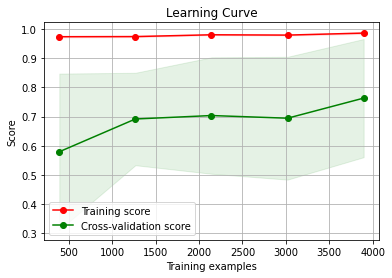

In [541]:
plot_learning_curve(RandomForestRegressor(max_depth=10, n_estimators=100, random_state=2000), X, y, cv=10);
# plot_learning_curve(RandomForestRegressor(), X, y);
plt.show()

In [542]:
features=['model_pojazu','wersja','generacja','bezwypadkowy_','rok_produkcji','przebieg_km','pojemnosc_skokowa_cm3','moc_KM']


In [543]:
def draw_feature_importances(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 5))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), model.feature_importances_[indices],
           color="b", align="center")
    plt.xticks(range(X.shape[1]), [ features[x] for x in indices])
    plt.xticks(rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

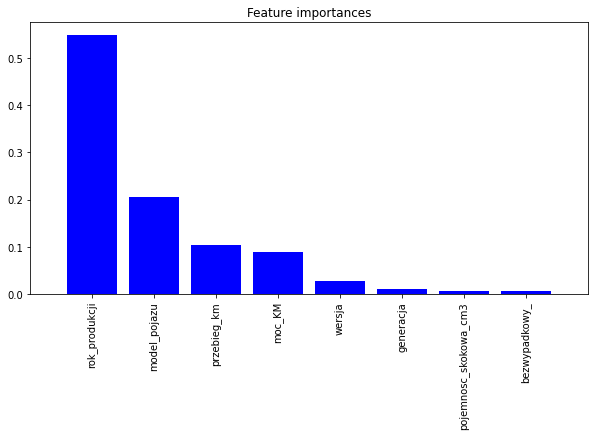

In [544]:
model = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=2000)
model.fit(X_train, y_train)

draw_feature_importances(model, features)

In [ ]:
df.to_json(r'mercedes_new.json')